# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [37]:
pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn
from sklearn.neighbors import NearestNeighbors  


In [3]:
#Read_dataset
ewairline=pd.read_csv('EastWestAirlines.csv')
ewairline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Column Rename and Set ID as Index Column

In [4]:
ewairline.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
ewairline.set_index('ID',inplace=True)
ewairline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


# Data Understanding

In [7]:
ewairline.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [8]:
ewairline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


### Different cc_miles have different max values. so, we want to check what values these columns can take

In [9]:
print('unique_cc1',ewairline.cc1_miles.unique())
print('unique_cc2',ewairline.cc2_miles.unique())
print('unique_cc3',ewairline.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [10]:
#Missing values
ewairline.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

### Exploratory Data Analysis
Analyze the features by creating histograms to understand the distribution

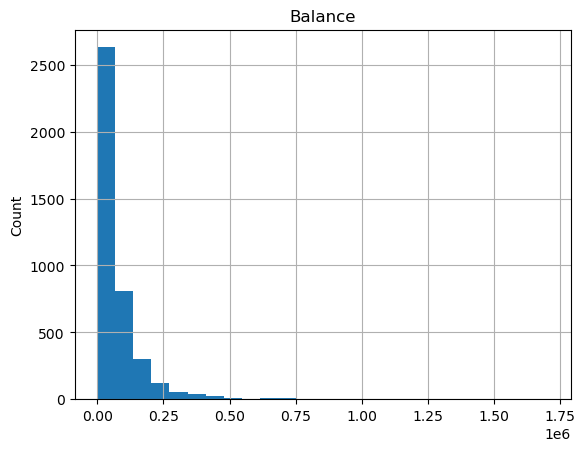

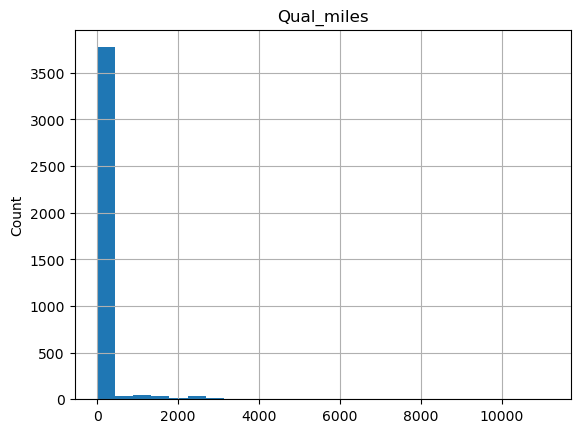

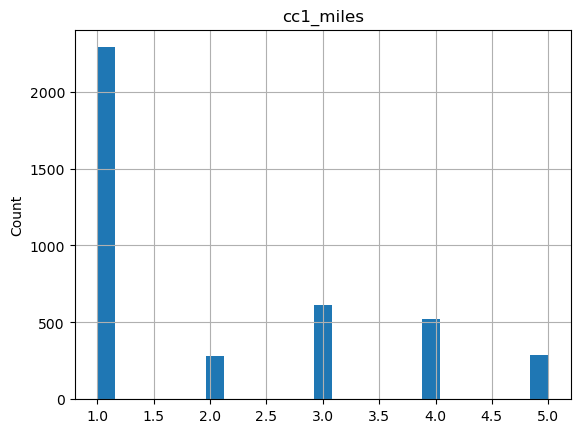

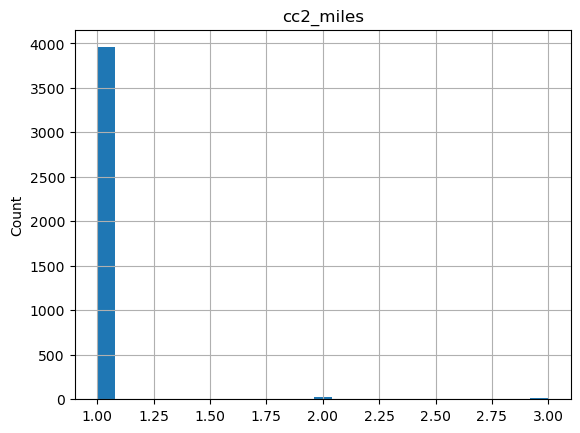

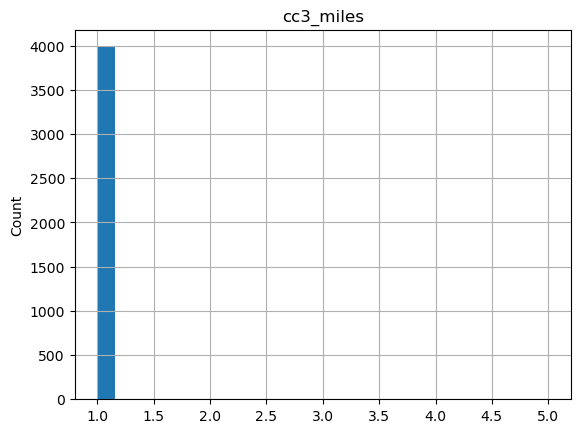

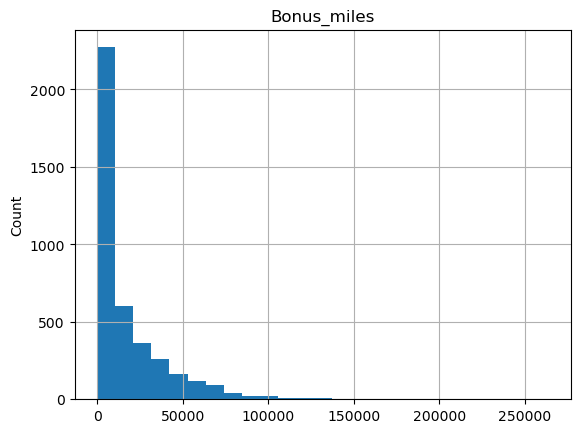

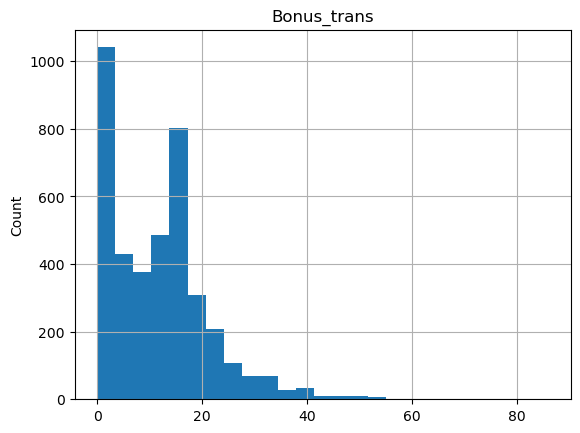

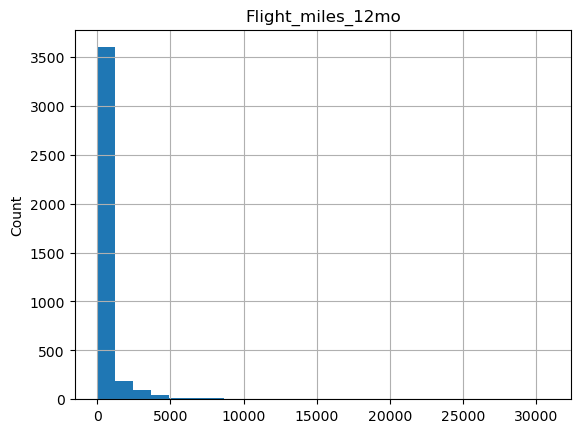

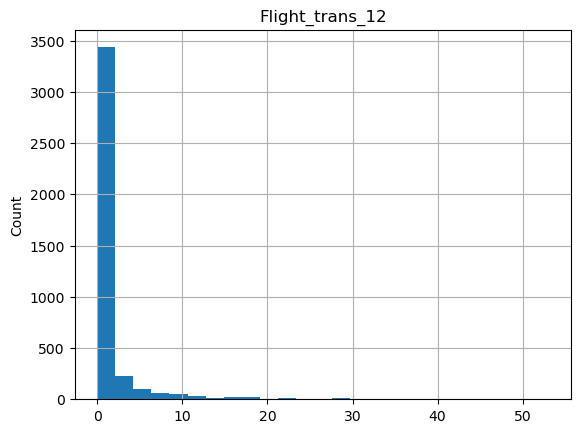

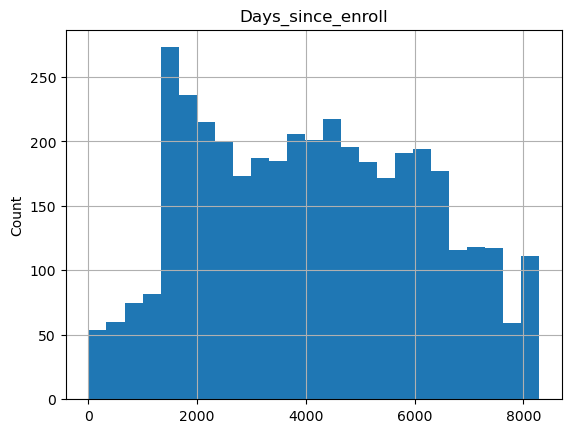

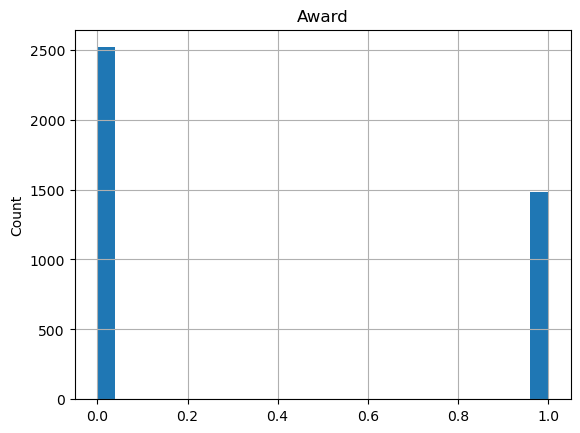

In [12]:
for feature in ewairline.columns:
    airline_data1 = ewairline.copy()
    ewairline[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

# Outliers Detection

In [13]:
ewairline.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

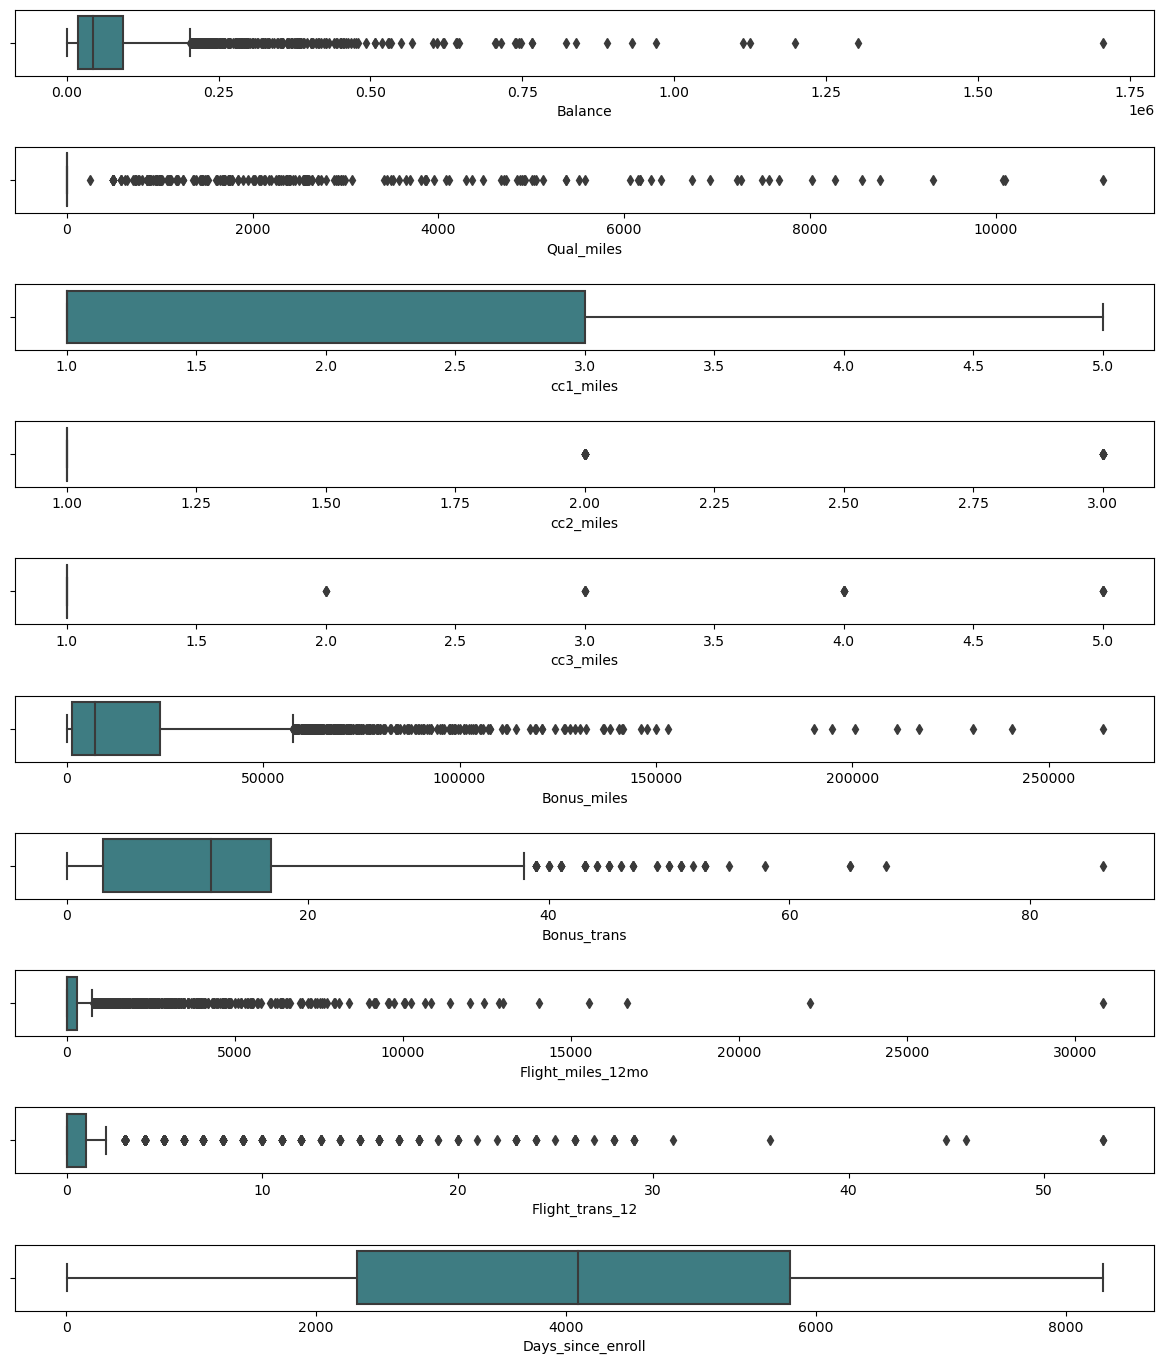

In [14]:
outlier = ewairline.copy() 
fig, axes=plt.subplots(10,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=outlier,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=outlier,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=outlier,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=outlier,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

In [17]:
countNotermdeposit = len(ewairline[ewairline.Award == 0])
countHavetermdeposit = len(ewairline[ewairline.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(ewairline.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((countHavetermdeposit / (len(ewairline.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


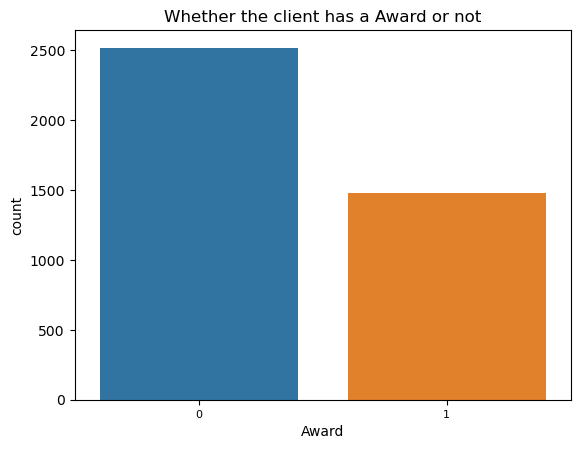

In [19]:
sns.countplot(x='Award', data= ewairline, order= ewairline['Award'].value_counts().index)
plt.xticks(fontsize = 8)
plt.title('Whether the client has a Award or not')
plt.show()

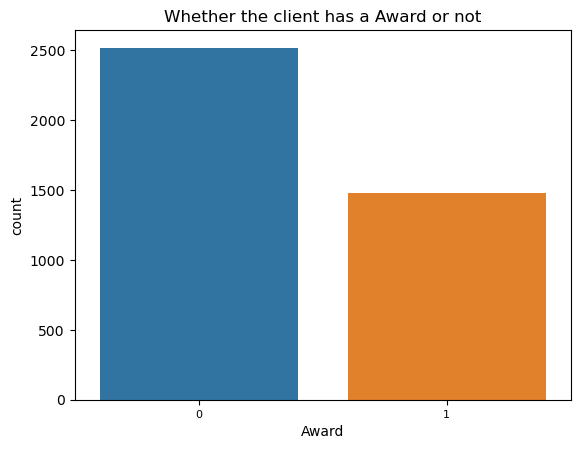

In [20]:
sns.countplot(x='Award', data= ewairline, order= ewairline['Award'].value_counts().index)
plt.xticks(fontsize = 8)
plt.title('Whether the client has a Award or not')
plt.show()

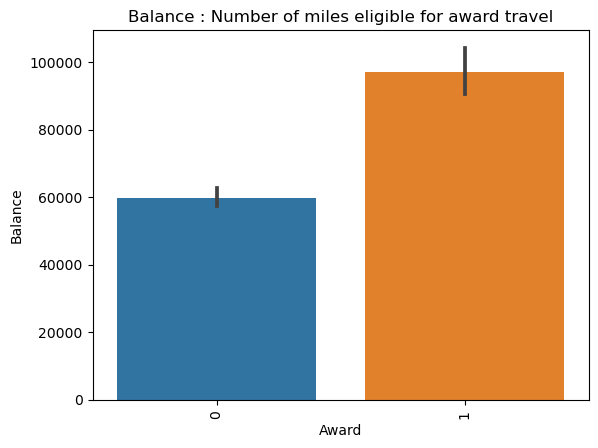

In [21]:
Balance = ewairline[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.title('Balance : Number of miles eligible for award travel')
plt.xticks(rotation=90)
plt.show()

#### What is correlated with Balance?

In [22]:
corr_matrix = ewairline.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

Correlation Heatmap

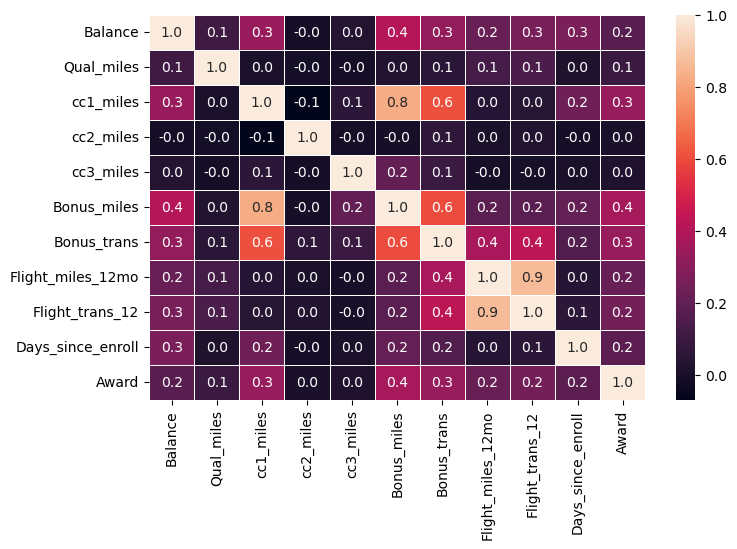

In [24]:
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(ewairline.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

#### Plotting frequent flying bonuses vs. non-flight bonus transactions

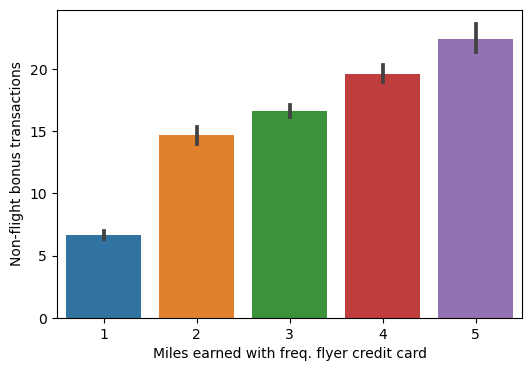

In [27]:
plt.figure(figsize = (6,4))
sorted_data = ewairline[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

###### Data Preprocessing
Standardizing the Data

In [40]:
standard_scaler = StandardScaler()
std_airline = standard_scaler.fit_transform(ewairline)
std_airline

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

##### Normalizing the data

In [42]:
minmax = MinMaxScaler()
norm_airline = minmax.fit_transform(ewairline)
norm_airline

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

##### However both give almost same result. So adopt Normalised data.

### Build Clustering model for Normalised data

### Buliding the Clustering model
Before selecting no. of clusters, check Silhouette score by varying number of clusters in the model build. Silhouette score gives the accuracy of a model.

In [48]:
for nc in range(2,11):
    h_cluster = AgglomerativeClustering(n_clusters=nc, linkage='average',affinity = "euclidean").fit(norm_airline)
    cluster_labels=pd.Series(h_cluster.labels_)
    slht_scr= sklearn.metrics.silhouette_score(norm_airline, cluster_labels)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.47040913679492186
For n_clusters = 3 The average silhouette_score is : 0.39619766243707655
For n_clusters = 4 The average silhouette_score is : 0.5286018409871408
For n_clusters = 5 The average silhouette_score is : 0.5082555071160846
For n_clusters = 6 The average silhouette_score is : 0.4872677894382957
For n_clusters = 7 The average silhouette_score is : 0.43873250506611094
For n_clusters = 8 The average silhouette_score is : 0.4087022964575043
For n_clusters = 9 The average silhouette_score is : 0.40082699430237484
For n_clusters = 10 The average silhouette_score is : 0.35722100020389563


###### Model with 4 no. of clusters has the highest accuracy. Hence build the model with 4 no. of clusters.

In [51]:
h_cluster = AgglomerativeClustering(n_clusters=4, linkage='average',affinity = "euclidean").fit(norm_airline) 
cluster_labels=pd.Series(h_cluster.labels_)
cluster_labels
ewairline['clust']=cluster_labels
ewairline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1.0
2,19244,0,1,1,1,215,2,0,0,6968,0,1.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1.0
4,14776,0,1,1,1,500,1,0,0,6952,0,0.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
4018,64385,0,1,1,1,981,5,0,0,1395,1,NaN
4019,73597,0,3,1,1,25447,8,0,0,1402,1,NaN


In [52]:
cluster_labels

0       1
1       1
2       1
3       1
4       0
       ..
3994    0
3995    0
3996    0
3997    1
3998    1
Length: 3999, dtype: int64

#### Analysing the results obtained from the model

In [54]:
ewairline.groupby(ewairline.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clust,,,,,,,,,,,
0.0,82556.153479,124.884720,2.202592,1.011596,1.011596,18882.423602,12.100955,443.808322,1.377899,4632.199181,0.404502
1.0,68847.996806,156.979242,1.980439,1.016367,1.012774,16201.441517,11.344511,473.757685,1.383234,3844.731737,0.350898
2.0,121639.000000,0.000000,5.000000,1.000000,1.000000,67286.000000,7.000000,0.000000,0.000000,7288.000000,1.000000
3.0,35757.500000,0.000000,1.500000,1.000000,1.000000,5808.500000,10.250000,37.500000,0.250000,2119.250000,0.250000


### We can see that 4 no. of clusters are formed
Following are the Different Passengers in each cluster

In [56]:
h_cluster_0 = ewairline[(ewairline.clust==0)]
h_cluster_0 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
ID,,,,,,,,,,,,
4,14776,0,1,1,1,500,1,0,0,6952,0,0.0
7,84914,0,3,1,1,27482,25,0,0,6994,0,0.0
8,20856,0,1,1,1,5250,4,250,1,6938,1,0.0
9,443003,0,3,2,1,1753,43,3850,12,6948,1,0.0
11,40091,0,2,1,1,7278,10,0,0,6959,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,16014,0,1,1,1,0,0,0,0,1450,0,0.0
3989,91605,0,4,1,1,37840,18,0,0,1444,0,0.0
3994,20954,0,1,1,1,375,3,0,0,1438,0,0.0


In [57]:
h_cluster_1 = ewairline[(ewairline.clust==1)]
h_cluster_1 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1.0
2,19244,0,1,1,1,215,2,0,0,6968,0,1.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1.0
6,16420,0,1,1,1,0,0,0,0,6942,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,62907,0,1,1,1,3200,3,200,1,1431,0,1.0
3992,12532,0,1,1,1,2069,9,0,0,1445,0,1.0
3993,52584,0,1,1,1,2500,1,0,0,1439,0,1.0


In [58]:
h_cluster_2 = ewairline[(ewairline.clust==2)]
h_cluster_2 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
ID,,,,,,,,,,,,
275,121639,0,5,1,1,67286,7,0,0,7288,1,2.0


In [59]:
h_cluster_3 = ewairline[(ewairline.clust==3)]
h_cluster_3 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
ID,,,,,,,,,,,,
2015,32678,0,1,1,1,0,0,0,0,4481,1,3.0
3235,96714,0,3,1,1,17026,15,0,0,2185,0,3.0
3583,7388,0,1,1,1,3958,15,150,1,446,0,3.0
3594,6250,0,1,1,1,2250,11,0,0,1365,0,3.0


<Figure size 640x320 with 0 Axes>

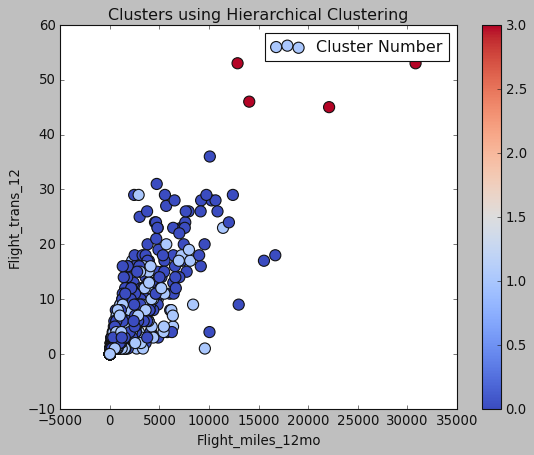

In [63]:
plt.style.use(['classic']) 
plt.figure(figsize=(8,4))
ewairline.plot(x="Flight_miles_12mo",y ="Flight_trans_12",c=cluster_labels,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Hierarchical Clustering') 
plt.show()

###### We can see that some of the observations of one cluster are overlapping with the other cluster. So let us check the accuracy of the model in classifying data by evaluating Silhouette score.

Evaluating accuracy of the model using Silhouette score

In [64]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_hc = sklearn.metrics.silhouette_score(norm_airline, cluster_labels)
slht_scr_hc

0.5286018409871408

###### The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

### Using K-means Clustering model

In [81]:
for nc in range(2,11):
    k1_cluster = KMeans(n_clusters=nc, random_state=0)
    y1_kmeans = k1_cluster.fit_predict(norm_airline)
    slht_scr= sklearn.metrics.silhouette_score(norm_airline, y1_kmeans)
    print("For n_clusters =", nc,"The average silhouette_score is :", slht_scr)

For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.46484529388583046
For n_clusters = 4 The average silhouette_score is : 0.4744941579482721
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.38865859989228385
For n_clusters = 7 The average silhouette_score is : 0.3909601011818369
For n_clusters = 8 The average silhouette_score is : 0.38030165896247936
For n_clusters = 9 The average silhouette_score is : 0.3842538055607832
For n_clusters = 10 The average silhouette_score is : 0.34523029131540034


#### Model with 2 no. of clusters has the highest accuracy. Hence build the model with 2 no. of clusters.

In [82]:
k_cluster = KMeans(n_clusters=2)
y_kmeans = k_cluster.fit_predict(norm_airline)

In [83]:
y_kmeans

array([0, 0, 0, ..., 1, 0, 0])

In [84]:
k_cluster.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [85]:
k_cluster.cluster_centers_

array([[ 3.50812450e-02,  7.85813260e-03,  1.76330421e-01,
         6.94996029e-03,  2.18427323e-03,  3.87875269e-02,
         1.06313612e-01,  7.34309944e-03,  1.23113582e-02,
         4.60411394e-01, -2.77555756e-16],
       [ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00]])

In [86]:
# Within cluster sum of squares or variance
k_cluster.inertia_

823.6756984125207

In [87]:
ks = pd.Series(y_kmeans) 
ewairline['clust']=ks
ewairline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0.0
2,19244,0,1,1,1,215,2,0,0,6968,0,0.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
4,14776,0,1,1,1,500,1,0,0,6952,0,1.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
4018,64385,0,1,1,1,981,5,0,0,1395,1,NaN
4019,73597,0,3,1,1,25447,8,0,0,1402,1,NaN


In [89]:
##Analysing the results obtained from the model
ewairline.groupby(ewairline.clust).mean()   

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clust,,,,,,,,,,,
0.0,68847.996806,156.979242,1.980439,1.016367,1.012774,16201.441517,11.344511,473.757685,1.383234,3844.731737,0.350898
1.0,82455.465670,124.460231,2.202583,1.011557,1.011557,18879.777702,12.092454,442.401768,1.373895,4627.171312,0.404487


In [92]:
##Following are the Different Passengers in each cluster
k_cluster_0 = ewairline[(ewairline.clust==0)]
k_cluster_0 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0.0
2,19244,0,1,1,1,215,2,0,0,6968,0,0.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0
6,16420,0,1,1,1,0,0,0,0,6942,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,62907,0,1,1,1,3200,3,200,1,1431,0,0.0
3992,12532,0,1,1,1,2069,9,0,0,1445,0,0.0
3993,52584,0,1,1,1,2500,1,0,0,1439,0,0.0


In [93]:
k_cluster_1 = ewairline[(ewairline.clust==1)]
k_cluster_1   

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
ID,,,,,,,,,,,,
4,14776,0,1,1,1,500,1,0,0,6952,0,1.0
7,84914,0,3,1,1,27482,25,0,0,6994,0,1.0
8,20856,0,1,1,1,5250,4,250,1,6938,1,1.0
9,443003,0,3,2,1,1753,43,3850,12,6948,1,1.0
11,40091,0,2,1,1,7278,10,0,0,6959,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,16014,0,1,1,1,0,0,0,0,1450,0,1.0
3989,91605,0,4,1,1,37840,18,0,0,1444,0,1.0
3994,20954,0,1,1,1,375,3,0,0,1438,0,1.0


In [96]:
#Evaluating accuracy of the model using Silhouette score
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_kc = sklearn.metrics.silhouette_score(norm_airline, k_cluster.labels_) 
slht_scr_kc

0.535930510919477

#### The score is closer to '0'. It indicates that the model is not that accurate at classifying the data, as clusters are overlapping. So try other methods of clustering.

## DB Scan Clustering model
Determining epsilon value

In [97]:
norm_airline

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [98]:
# Nearest neighbours = 2x(no. of Dimensions/columns)
nn = NearestNeighbors(n_neighbors=22)
nn = nn.fit(norm_airline)
distances, indices = nn.kneighbors(norm_airline) 

In [99]:
distances

array([[0.        , 0.00871531, 0.00982329, ..., 0.02932871, 0.02945634,
        0.03071875],
       [0.        , 0.01212297, 0.01331785, ..., 0.03473729, 0.03509134,
        0.03514045],
       [0.        , 0.01857767, 0.01872551, ..., 0.04552297, 0.04668783,
        0.04773513],
       ...,
       [0.        , 0.02591961, 0.04945468, ..., 0.1198017 , 0.11996173,
        0.12060709],
       [0.        , 0.0264501 , 0.02784951, ..., 0.03925554, 0.03970704,
        0.03979314],
       [0.        , 0.00038605, 0.0027753 , ..., 0.0198035 , 0.02220023,
        0.02328785]])

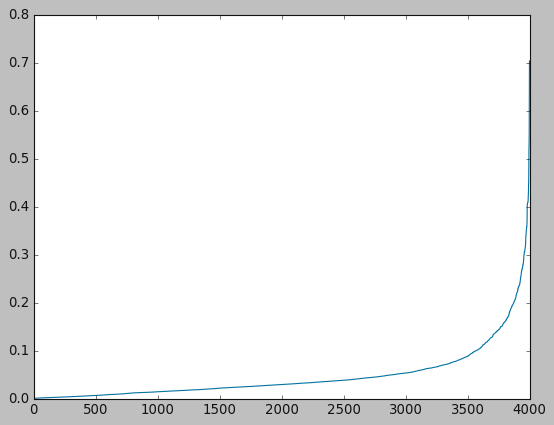

In [100]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances) 

###### The curve takes a sharp bend at a value of 0.2. Hence the epsilon value is 0.2.

### Building the DB Scan clustering model

In [101]:
# min_samples=(no. of Dimensions/columns)+1
d_cluster = DBSCAN(eps=0.2, min_samples=12)
d_cluster.fit(norm_airline)  

DBSCAN(eps=0.2, min_samples=12)

In [102]:
d_cluster.labels_ 

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [104]:
ds = pd.Series(d_cluster.labels_) 
ewairline['clust']=ds
ewairline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0.0
2,19244,0,1,1,1,215,2,0,0,6968,0,0.0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0.0
4,14776,0,1,1,1,500,1,0,0,6952,0,1.0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,NaN
4018,64385,0,1,1,1,981,5,0,0,1395,1,NaN
4019,73597,0,3,1,1,25447,8,0,0,1402,1,NaN


In [106]:
#Analysing the results obtained from the model
ewairline.groupby(ewairline.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
clust,,,,,,,,,,,
-1.0,73848.201717,86.858369,2.025751,1.004292,1.000000,15939.772532,11.789700,440.540773,1.412017,4663.506438,0.377682
0.0,64028.229341,178.725150,1.940120,1.016766,1.014970,15689.397605,11.201796,479.811377,1.380240,3597.819162,0.340719
1.0,85151.000000,178.086022,2.290323,1.007168,1.039427,20318.387097,12.483871,542.971326,1.716846,4719.362007,0.394265
2.0,82236.978125,104.178125,2.156250,1.018750,1.012500,18340.881250,12.393750,502.671875,1.387500,4188.340625,0.365625
3.0,79427.046465,110.472727,2.125253,1.018182,1.008081,17707.680808,11.696970,460.367677,1.458586,4327.531313,0.406061
4.0,74204.940741,120.914815,2.125926,1.014815,1.007407,16024.485185,11.974074,360.296296,1.133333,4451.659259,0.403704
5.0,75171.114286,129.177143,2.045714,1.028571,1.000000,18275.302857,10.662857,322.942857,1.005714,4166.685714,0.360000
6.0,105393.023121,136.265896,2.445087,1.005780,1.000000,24278.930636,12.595376,386.156069,1.173410,5441.150289,0.410405
7.0,86724.732673,126.143564,2.133663,1.004950,1.004950,18263.742574,11.900990,495.549505,1.589109,4753.519802,0.435644


Following are the Different Passengers in each cluster

In [107]:
array = np.sort(ewairline["clust"].unique())
list = array.tolist()
for i in list:
    d_cluster_n = ewairline[(ewairline.clust==i)]
    print("\nThe following are the passengers in Cluster-'"+str(i)+"'\n\n",d_cluster_n)


The following are the passengers in Cluster-'-1.0'

       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
8       20856           0          1          1          1         5250   
65      80250           0          1          1          1          895   
87      24093           0          1          1          1         1750   
94       2000           0          1          1          1         2000   
106     28667           0          1          1          1         3861   
...       ...         ...        ...        ...        ...          ...   
3883    35650           0          3          1          1        23130   
3897    25753           0          1          1          1         3400   
3911      771           0          1          1          1        13160   
3917    43310           0          1          1          1        10058   
3959    14440           0          1          

Clusters with label '-1' are generally categorised as Outliers.

<Figure size 480x320 with 0 Axes>

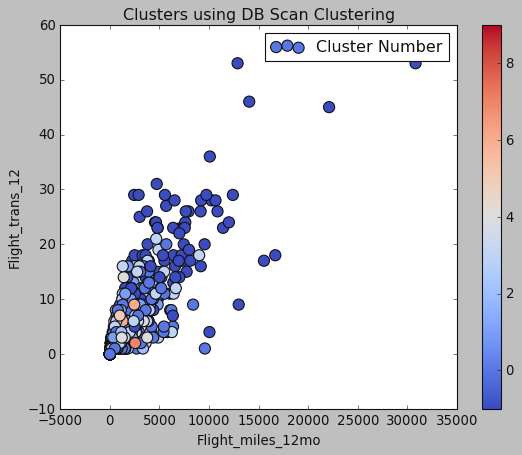

In [111]:
plt.style.use(['classic']) 
plt.figure(figsize=(6,4))
ewairline.plot(x="Flight_miles_12mo",y ="Flight_trans_12",c=d_cluster.labels_,label = 'Cluster Number',kind="scatter",s=100 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using DB Scan Clustering')  
plt.show()

### Evaluating accuracy of the model using Silhouette score

In [112]:
# Silhouette score ranges from -1 to 1. '-1' indicates model is not good. '1' indicates model is best. 
# '0' indicates clusters are overlapping
slht_scr_dc = sklearn.metrics.silhouette_score(norm_airline, d_cluster.labels_) 
slht_scr_dc

0.21230627176776276

##### Observation
The Silhouette score is closer to '0'. Hence DB Scan clustering model is not able to classify the dataset accurately. 

### Comparing all the models using Silhouette score

In [113]:
print("The Silhouette score of Hierarchical Clustering:",slht_scr_hc)
print("The Silhouette score of KMeans Clustering:",slht_scr_kc)
print("The Silhouette score of DB Scan Clustering:",slht_scr_dc)

The Silhouette score of Hierarchical Clustering: 0.5286018409871408
The Silhouette score of KMeans Clustering: 0.535930510919477
The Silhouette score of DB Scan Clustering: 0.21230627176776276


### Conclusion
Hence the Kmeans clustering model can be selected to classify the dataset.

## Recommendation
Maximum award given to cluster '0' in the past. Airlines have to add future schemes for cluster '1' members on different bonus points & card transaction bonus.